In [15]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

In [2]:
Inflation_data = pd.read_csv('/Users/ismatahmed/neuefische/da_capstone_group3/data/RATEINF-CPI_DEU.csv', delimiter=',', encoding='latin')
Inflation_data.head(5)

,Date,Value
0,2023-06-30,116.8
1,2023-05-31,116.5
2,2023-04-30,116.6
3,2023-03-31,116.1
4,2023-02-28,115.2


In [3]:
Inflation_data.sort_values(by=['Date'], inplace=True)
Inflation_data.head()

,Date,Value
389,1991-01-31,64.0
388,1991-02-28,64.3
387,1991-03-31,64.3
386,1991-04-30,64.5
385,1991-05-31,64.7


In [4]:
Inflation_data['Date'] = pd.to_datetime(Inflation_data['Date'])

In [5]:
Inflation_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 390 entries, 389 to 0
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    390 non-null    datetime64[ns]
 1   Value   390 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 9.1 KB


In [6]:
Inflation_data.set_index('Date', inplace=True)

In [7]:
Inflation_data['Inflation_Rate_prev_Month'] = Inflation_data['Value'].pct_change() * 100
Inflation_data['Inflation_Rate_prev_Month'] = Inflation_data['Inflation_Rate_prev_Month'].round(1)
Inflation_data

,Value,Inflation_Rate_prev_Month
Date,,
1991-01-31,64.0,NaN
1991-02-28,64.3,0.5
1991-03-31,64.3,0.0
1991-04-30,64.5,0.3
1991-05-31,64.7,0.3
...,...,...
2023-02-28,115.2,0.8
2023-03-31,116.1,0.8
2023-04-30,116.6,0.4


In [32]:
Inflation_data['Inflation_Rate_prev_Year'] = Inflation_data['Value'].pct_change(periods = 12) * 100
Inflation_data['Inflation_Rate_prev_Year'] = Inflation_data['Inflation_Rate_prev_Year'].round(1)
Inflation_data.tail(5)

,Value,Inflation_Rate_prev_Month,Inflation_Rate_prev_Year
Date,,,
2023-02-28,115.2,0.8,8.7
2023-03-31,116.1,0.8,7.4
2023-04-30,116.6,0.4,7.2
2023-05-31,116.5,-0.1,6.1
2023-06-30,116.8,0.3,6.4


In [12]:
Inflation_data.dropna(subset=['Inflation_Rate_prev_Year'], inplace=True)

In [40]:
Inflation_data.shape

(378, 3)

In [13]:
#check wether data is stationary
def check_stationarity(ts):
    dftest = adfuller(ts)
    adf = dftest[0]
    pvalue = dftest[1]
    critical_value = dftest[4]['5%']
    if (pvalue < 0.05) and (adf < critical_value):
        print('The series is stationary')
    else:
        print('The series is NOT stationary')

In [14]:
check_stationarity(Inflation_data['Inflation_Rate_prev_Year'])

The series is stationary


/opt/homebrew/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/matplotlib/axes/_base.py:2503: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)
/opt/homebrew/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


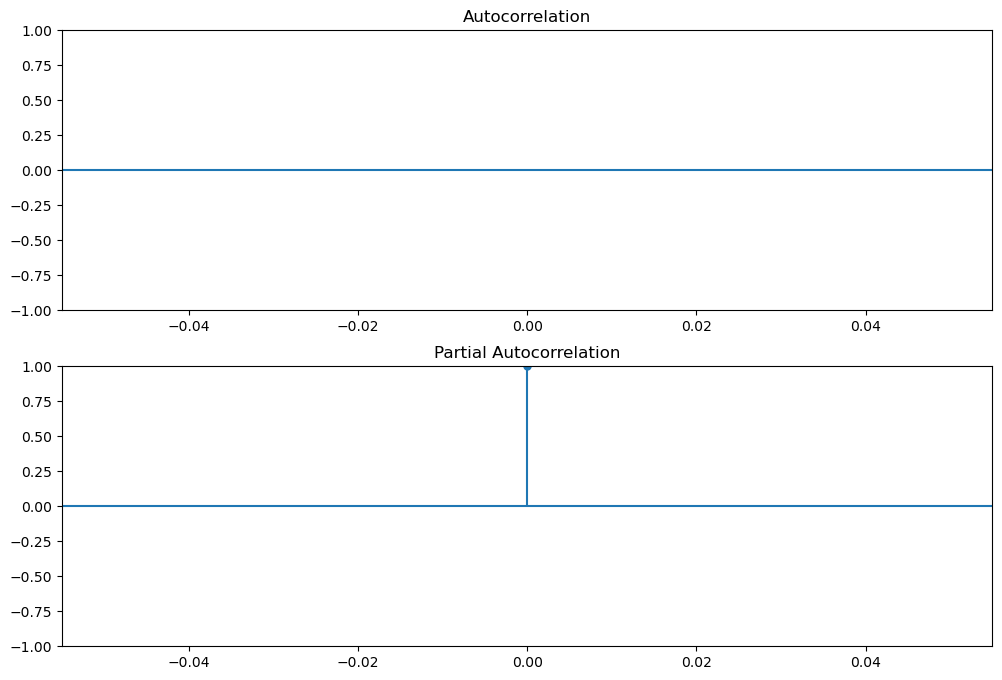

In [41]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(Inflation_data['Inflation_Rate_prev_Year'], lags=30, ax=ax1)
plot_pacf(Inflation_data['Inflation_Rate_prev_Year'], lags=14, ax=ax2)
plt.show()

In [23]:
model = sm.tsa.SARIMAX(Inflation_data['Inflation_Rate_prev_Year'], order=(1, 0, 1), seasonal_order=(1, 0, 1, 12))  # Change order values accordingly
results = model.fit()
forecast_steps = 12 
forecast_values = results.forecast(steps=forecast_steps)

# Print the forecasted values
print("Forecasted Inflation Rate:")
print(forecast_values)

/opt/homebrew/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/opt/homebrew/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.84893D+00    |proj g|=  3.42845D+00

At iterate    5    f=  7.07064D-01    |proj g|=  4.00764D-01

At iterate   10    f=  6.95533D-01    |proj g|=  3.68614D-02

At iterate   15    f=  6.67329D-01    |proj g|=  5.09910D-02

At iterate   20    f=  6.53009D-01    |proj g|=  3.82863D-02

At iterate   25    f=  6.51477D-01    |proj g|=  3.39590D-03

At iterate   30    f=  6.51448D-01    |proj g|=  6.25785D-04
Forecasted Inflation Rate:
2023-07-31    6.104660
2023-08-31    5.804875
2023-09-30    4.381463
2023-10-31    3.950474
2023-11-30    3.556302
2023-12-31    4.193014
2024-01-31    2.769621
2024-02-29    2.615134
2024-03-31    2.567844
2024-04-30    2.552788
2024-05-31    2.885592
2024-06-30    2.757933
Freq: M, Name: predicted_mean, dtype: float64

           * * *

Tit   = total number of iterati

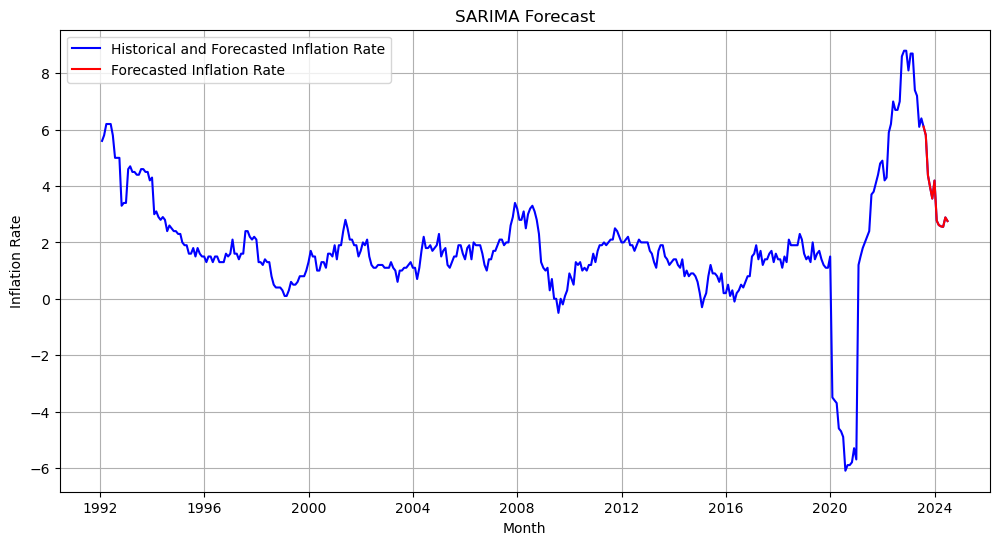

In [25]:
# Generate future dates for the forecast
future_dates = pd.date_range(start=Inflation_data.index[-1], periods=forecast_steps + 1, freq='M')[1:]

# Combine the historical and forecasted data for plotting
all_dates = Inflation_data.index.union(future_dates)
all_inflation = pd.concat([Inflation_data['Inflation_Rate_prev_Year'], pd.Series(forecast_values, index=future_dates)])

# Plot the forecasted inflation rate
plt.figure(figsize=(12, 6))
plt.plot(all_dates, all_inflation, label='Historical Inflation Rate', color='blue')
plt.plot(future_dates, forecast_values, label='Forecasted Inflation Rate', color='red')
plt.xlabel('Month')
plt.ylabel('Inflation Rate')
plt.title('SARIMA Forecast')
plt.legend()
plt.grid(True)
plt.show()

In [28]:
model = sm.tsa.ARIMA(Inflation_data['Inflation_Rate_prev_Year'], order=(1, 0, 1))  
results = model.fit()
forecast_steps = 12 
forecast_values = results.forecast(steps=forecast_steps)

# Print the forecasted values
print("Forecasted Inflation Rate:")
print(forecast_values.round(1))

Forecasted Inflation Rate:
2023-07-31    6.3
2023-08-31    6.1
2023-09-30    6.0
2023-10-31    5.9
2023-11-30    5.8
2023-12-31    5.7
2024-01-31    5.6
2024-02-29    5.5
2024-03-31    5.4
2024-04-30    5.3
2024-05-31    5.2
2024-06-30    5.1
Freq: M, Name: predicted_mean, dtype: float64


/opt/homebrew/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/opt/homebrew/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/opt/homebrew/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


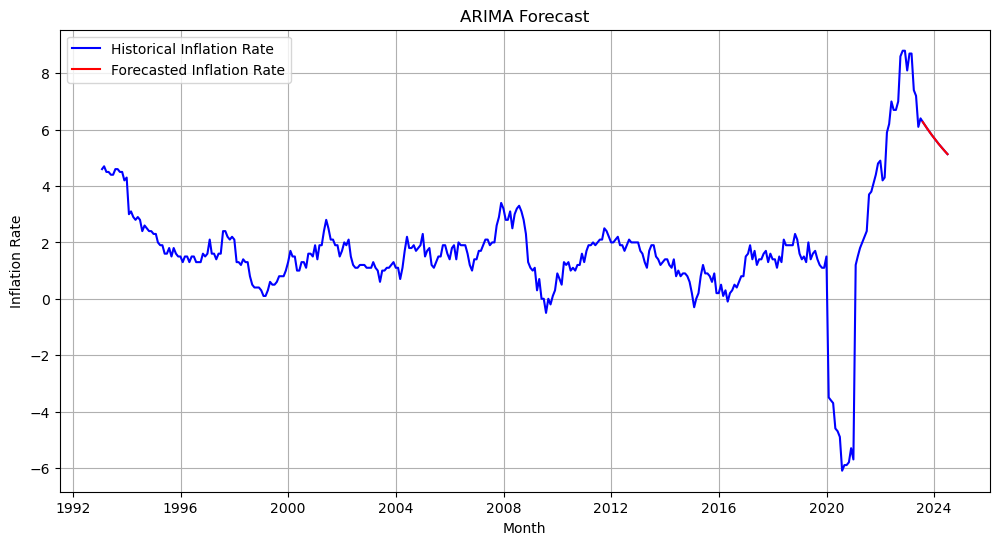

In [42]:
# Generate future dates for the forecast
future_dates = pd.date_range(start=Inflation_data.index[-1], periods=forecast_steps + 1, freq='M')[1:]

# Combine the historical and forecasted data for plotting
all_dates = Inflation_data.index.union(future_dates)
all_inflation = pd.concat([Inflation_data['Inflation_Rate_prev_Year'], pd.Series(forecast_values, index=future_dates)])

# Plot the forecasted inflation rate
plt.figure(figsize=(12, 6))
plt.plot(all_dates, all_inflation, label='Historical Inflation Rate', color='blue')
plt.plot(future_dates, forecast_values, label='Forecasted Inflation Rate', color='red') #adhkhas
plt.xlabel('Month')
plt.ylabel('Inflation Rate')
plt.title('ARIMA Forecast')
plt.legend()
plt.grid(True)
plt.show()